In [2]:
import numpy
import pickle
import glob
import os
import re
from collections import Counter
from itertools import groupby
import matplotlib.pyplot as plt

In [3]:
# Brunet's "bestiaire": the list of animals consistently used by Brunet in his original work.
# Largely taken from Table 1.1, with some additions from the prose & other graphs/tables
# ('truite' is one example not in Table 1.1, but rather in the text of the paper itself, where it's
# analyzed as a subcategory of 'poisson')

bestiaire = ["abeille", "aigle", "âne", "animal", "araignée", "boeuf", 
             "canard", "cerf", "chat", "cheval", "chèvre", "chien", 
             "chouette", "cochon", "coq", "cygne", "dragon", "écureuil",
             "éléphant", "fourmi", "gibier", "insecte", "lapin", "lièvre",
             "loup", "moineau", "mouche", "mouton", "oie", "oiseau", "ours", 
             "papillon", "perroquet", "pigeon", "poisson", "poule", "poulet",
             "rat", "renard", "rossignol", "serpent", "singe", "souris", 
             "tigre", "truite", "vache", "veau"]

In [4]:
# Utility functions

def load_preprocessed_data(source_dir):
    print('loading data...', end='')
    file_paths = [f for f in glob.glob(source_dir + "*.txt")]
    input_data_dict = {}
    for path in file_paths:
        file = open(path , "rb")
        input_data_dict[os.path.basename(path)] = pickle.load(file)
        file.close()
        print('.', end='')
    print('done loading data.')
    return input_data_dict

def get_author_name_from_path_regex(file_path):
    return re.search('(?<=-)(.+)(?=-)', file_path).group()

def bar_plot(title, names, values):
    plt.bar(range(len(values)), values, tick_label=list(names))
    format_plot(title)


def format_plot(title):
    plt.xticks(rotation=90)
    plt.title(title)
    plt.savefig(title + '.png')
    plt.show()


def bar_plot_multiple(title, names, v1, v2):
    plt.bar(range(len(v1)), v1, tick_label=list(names))
    plt.bar(numpy.array(range(len(v2)))-0.2, v2, tick_label=list(names))
    format_plot(title)


def counter_subtract(c1, c2):
    c1.subtract(c2)
    return c1

In [5]:
# This function counts instances of "animal words" across all texts in the corpus, for each animal in the bestiaire.
# 
# Motivation:
# An extremely rudimentary word counter across all texts. We need to start somewhere, right? 
# Many possible extensions could be imagined: for instance, consideration of categories & subcategories 
# (e.g. category = poisson, subcategory = truite) but it's not clear in Brunet's text whether he did this himself.
#
# Method description:
# Generates a dictionary as follows:
#     key: the book file path (where the book is stored on the computer)
#     item: a dictionary, with animal names from Brunet's Bestiaire as keys, and raw counts within that book for each key as values.
# Note: counts are created by comparing lemmas. Part of speech information is not taken into account.

def compute_bestiaire_counts(book_data_dict):
    book_bestiaire_count_dict = {}
    for book_file_path, tag_sequence in book_data_dict.items():
        sorted_tags = sorted(tag_sequence, key=lambda tag: tag.lemma)
        counts = [(i, len(list(c))) for i, c  in groupby(sorted_tags, key=lambda tag: tag.lemma)]
        bestiaire_counts = {animal: 0 for animal in bestiaire}
        bestiaire_counts.update({i: c for i, c in counts if i in bestiaire})
        book_bestiaire_count_dict[book_file_path] = bestiaire_counts
        print(book_file_path + ' bestiaire count complete')
    return book_bestiaire_count_dict


In [6]:
# Another utility function, but worth explaining:
# compute_bestiaire_counts operates across books. For some of Brunet's analysis, we need counts across author
def merge_author_counts(book_bestiaire_count_dict):
    author_bestiaire_count_dict = {get_author_name_from_path_regex(key): Counter()
                                   for key in book_bestiaire_count_dict.keys()}
    for book_path, count_dict in book_bestiaire_count_dict.items():
        author = get_author_name_from_path_regex(book_path)
        author_bestiaire_count_dict[author].update(Counter(count_dict))
    return author_bestiaire_count_dict

loading data..................................................done loading data.
1935-Maxence Van Der Meersch-INVASION 14.txt bestiaire count complete
1802-Chateaubriand-RENE.txt bestiaire count complete
1913-Proust-DU CÔTÉ DE CHEZ SWANN.txt bestiaire count complete
1883-Zola-AU BONHEUR DES DAMES.txt bestiaire count complete
1913-Valery Larbaud-A.O. Barnabooth.txt bestiaire count complete
1891-Huysmans-La bas.txt bestiaire count complete
1922-Martin Du Gard-LES THIBAULT.txt bestiaire count complete
1916-Colette-LA PAIX CHEZ LES BATES.txt bestiaire count complete
1894-Jules Renard-Poil de Carotte.txt bestiaire count complete
1902-Colette-Claudine a l’École.txt bestiaire count complete
1929-Colette-Sido.txt bestiaire count complete
1883-Maupassant-Contes et Nouvelles.txt bestiaire count complete
1929-Jean Giono-Un de Baumugnes.txt bestiaire count complete
1904-Colette-Dialogues De Bêtes.txt bestiaire count complete
1932-Celine-VOYAGE AU BOUT DE LA NUIT .txt bestiaire count complete
1807-

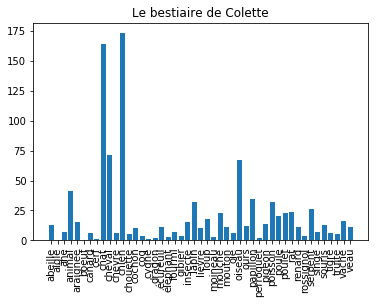

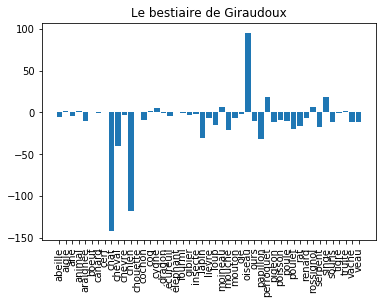

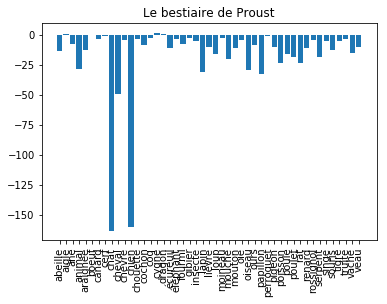

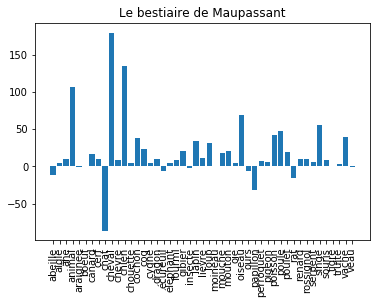

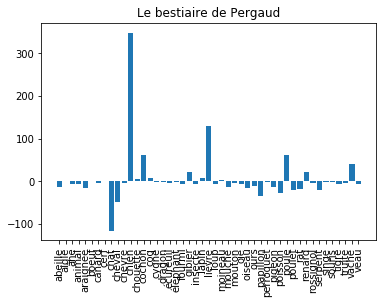

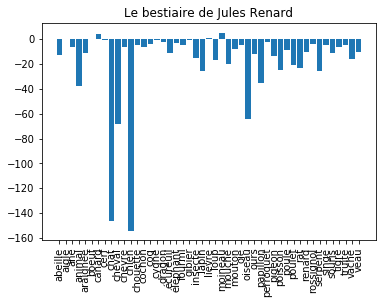

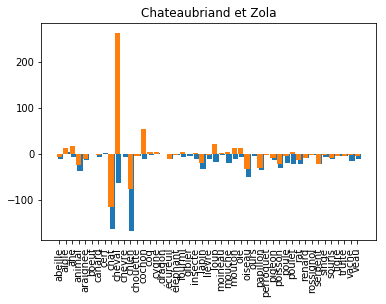

In [7]:
# This script replicates the plots from Graphiques 2-6 in Brunet, given animal counts across authors as computer
# in the functions above.

# The first plot displays animal counts for Colette, the following display animal counts for a few other authors 
# relative to Colette. 


# Note: for Graphique 6 I have used Chateaubriand instead of Balzac. 
# This was an arbitrary choice to compensate for not having any Balzac in our corpus.

# Analysis:
# I don't believe the quantitative results are very worthwhile, considering our concerns about whether our corpus 
# is actually representative of Brunet's in numbers or proportion, and also considering that I haven't written 
# any tests to ensure I'm not missing counts. This is more just to demonstrate that the graphs are pretty easy 
# to make, and that it's easy to get flexibility in the text input once we have other texts we would like to 
# consider.

source_dir = "../data/"

book_data_dict = load_preprocessed_data(source_dir)
book_bestiaire_count_dict = compute_bestiaire_counts(book_data_dict)
a_bestiaire_dict = merge_author_counts(book_bestiaire_count_dict)

keys = a_bestiaire_dict['Colette'].keys()
bar_plot('Le bestiaire de Colette', keys, a_bestiaire_dict['Colette'].values())
bar_plot('Le bestiaire de Giraudoux', keys, counter_subtract(a_bestiaire_dict['Giraudoux'], a_bestiaire_dict['Colette']).values())
bar_plot('Le bestiaire de Proust', keys, counter_subtract(a_bestiaire_dict['Proust'], a_bestiaire_dict['Colette']).values())
bar_plot('Le bestiaire de Maupassant', keys, counter_subtract(a_bestiaire_dict['Maupassant'], a_bestiaire_dict['Colette']).values())
bar_plot('Le bestiaire de Pergaud', keys, counter_subtract(a_bestiaire_dict['Pergaud'], a_bestiaire_dict['Colette']).values())
bar_plot('Le bestiaire de Jules Renard', keys, counter_subtract(a_bestiaire_dict['Jules Renard'], a_bestiaire_dict['Colette']).values())
bar_plot_multiple('Chateaubriand et Zola', keys,
                  counter_subtract(a_bestiaire_dict['Chateaubriand'], a_bestiaire_dict['Colette']).values(),
                  counter_subtract(a_bestiaire_dict['Zola'], a_bestiaire_dict['Colette']).values())